In [63]:
import requests as r
import time
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [64]:
#Go to website
web_url = "https://bindingofisaacrebirth.fandom.com/wiki/Items"
items_text = r.get(web_url).text

In [65]:
soup = BeautifulSoup(items_text)
tables = soup.find_all('table')
active_items = tables[0]
passive_items = tables[1]

In [66]:
headers = [header.text.strip() for header in active_items.find_all('th')]
headers

['Name', 'ID', 'Icon', 'Quote', 'Description', 'Quality']

In [67]:
rows = []

# Find all `tr` tags
data_rows = active_items.find_all('tr')

for row in data_rows:
    value = row.find_all('td')
    beautified_value = [ele.text.strip() for ele in value]
    # Remove data arrays that are empty
    if len(beautified_value) == 0:
        continue
    rows.append(beautified_value)

rows

[['A Pony',
  '5.100.130',
  '',
  'Flight + dash attack',
  'Passively grants flight and increases speed to 1.5. Upon use, Isaac charges in the direction the pony is facing, giving invulnerability during the charge and dealing damage to enemies hit.',
  '2'],
 ['Anarchist Cookbook',
  '5.100.65',
  '',
  'Summon bombs',
  'Spawns six   Troll Bombs around the room.',
  '1'],
 ['Best Friend',
  '5.100.136',
  '',
  "Friends 'till the end",
  'Spawns a decoy Isaac that explodes after 5 seconds. Enemies will always target the decoy and ignore Isaac.',
  '1'],
 ['Blank Card',
  '5.100.286',
  '',
  'Card mimic',
  'Copies the effect of the card or rune currently held by Isaac. Copies the effect of the card currently held by Isaac. The charge time is based on the power of the card.',
  '2'],
 ['Blood Rights',
  '5.100.186',
  '',
  'Mass enemy damage at a cost',
  'Upon use, takes a full heart of health and deals 40 damage to all enemies in the room.  Repeated uses in the same room only tak

In [68]:
angel_url = "https://bindingofisaacrebirth.fandom.com/wiki/Angel_Room_(Item_Pool)"
devil_url = "https://bindingofisaacrebirth.fandom.com/wiki/Devil_Room_(Item_Pool)"
treasure_url = "https://bindingofisaacrebirth.fandom.com/wiki/Treasure_Room_(Item_Pool)"
shop_url = "https://bindingofisaacrebirth.fandom.com/wiki/Shop_(Item_Pool)"
planet_url = "https://bindingofisaacrebirth.fandom.com/wiki/Planetarium_(Item_Pool)"
secret_url = "https://bindingofisaacrebirth.fandom.com/wiki/Secret_Room_(Item_Pool)"
goldchest_url = "https://bindingofisaacrebirth.fandom.com/wiki/Golden_Chest_(Item_Pool)"
cursed_url = "https://bindingofisaacrebirth.fandom.com/wiki/Curse_Room_(Item_Pool)"
library_url = "https://bindingofisaacrebirth.fandom.com/wiki/Library_(Item_Pool)"
boss_url = "https://bindingofisaacrebirth.fandom.com/wiki/Boss_(Item_Pool)"


In [69]:
def scrapeWeb(weburl):
    items_text = r.get(weburl).text
    soup = BeautifulSoup(items_text)
    tables = soup.find_all('table')
    return tables

In [70]:
def getTables(table):
    headers = [header.text.strip() for header in table.find_all('th')]
    rows = []

    # Find all `tr` tags
    data_rows = table.find_all('tr')

    for row in data_rows:
        value = row.find_all('td')
        beautified_value = [ele.text.strip() for ele in value]
        # Remove data arrays that are empty
        if len(beautified_value) == 0:
            continue
        rows.append(beautified_value)

    df = pd.DataFrame(columns = headers, data = rows)
    return df

In [71]:
def drawChart(df):
    cnt_df = df.value_counts('Quality')
    print(cnt_df)
    cnt_df.plot.pie(figsize=(5, 5), autopct='%1.1f%%', startangle=0)
    plt.legend()
    plt.show()
    

In [72]:
def mergeTables(df1, df2):
    return pd.concat([df1, df2],ignore_index=True)

In [73]:
active_df = getTables(active_items)
active_df = active_df.drop(columns = ['Icon'])

active_df

,Name,ID,Quote,Description,Quality
0,A Pony,5.100.130,Flight + dash attack,Passively grants flight and increases speed to...,2
1,Anarchist Cookbook,5.100.65,Summon bombs,Spawns six Troll Bombs around the room.,1
2,Best Friend,5.100.136,Friends 'till the end,Spawns a decoy Isaac that explodes after 5 sec...,1
3,Blank Card,5.100.286,Card mimic,Copies the effect of the card or rune currentl...,2
4,Blood Rights,5.100.186,Mass enemy damage at a cost,"Upon use, takes a full heart of health and dea...",0
...,...,...,...,...,...
166,The Scooper,5.100.605,Plop!,"Summons The Peeper for the current room, whic...",1
167,Urn of Souls,5.100.640,Unleash their sorrow,Spews a stream of damaging flame. Gains Soul C...,3
168,Vade Retro,5.100.653,Begone!,"While held, enemies leave behind ghosts on dea...",2
169,Wavy Cap,5.100.582,Tears up. A mind changing experience!,"Increases fire rate, decreases speed, and dist...",1


In [74]:
passive_df = getTables(passive_items)
passive_df = passive_df.drop(columns = ['Icon'])

passive_df


,Name,ID,Quote,Description,Quality
0,???'s Only Friend,5.100.320,Controlled friend,Spawns a controllable familiar that deals 37.5...,1
1,<3,5.100.15,HP up,Grants Isaac one Red Heart container and fully...,2
2,1up!,5.100.11,Extra life,"Gives Isaac an extra life. Upon death, he will...",2
3,20/20,5.100.245,Double shot,"Isaac fires two tears at once, one from each e...",4
4,3 Dollar Bill,5.100.191,Rainbow tears,Gives Isaac a random tear effect every room. G...,2
...,...,...,...,...,...
544,Vengeful Spirit,5.100.702,Hot blooded,"After taking damage, spawns an orbital wisp th...",1
545,Venus,5.100.591,HP up + you feel pretty,Adds one red Heart container. Heals 1 addition...,2
546,Voodoo Head,5.100.599,Extra curse rooms,Spawns an additional Curse Room on each floor...,2
547,Worm Friend,5.100.682,Clingy buddy,Gives Isaac a Nerve Ending familiar that bur...,3


Since there's an item with no quality (that's a trinket, I'mma remove that)

In [75]:
passive_df = passive_df.drop(index = 548)
passive_df

,Name,ID,Quote,Description,Quality
0,???'s Only Friend,5.100.320,Controlled friend,Spawns a controllable familiar that deals 37.5...,1
1,<3,5.100.15,HP up,Grants Isaac one Red Heart container and fully...,2
2,1up!,5.100.11,Extra life,"Gives Isaac an extra life. Upon death, he will...",2
3,20/20,5.100.245,Double shot,"Isaac fires two tears at once, one from each e...",4
4,3 Dollar Bill,5.100.191,Rainbow tears,Gives Isaac a random tear effect every room. G...,2
...,...,...,...,...,...
543,Vasculitis,5.100.657,Clogged enemies,"Enemies explode into tears upon death, which i...",1
544,Vengeful Spirit,5.100.702,Hot blooded,"After taking damage, spawns an orbital wisp th...",1
545,Venus,5.100.591,HP up + you feel pretty,Adds one red Heart container. Heals 1 addition...,2
546,Voodoo Head,5.100.599,Extra curse rooms,Spawns an additional Curse Room on each floor...,2


In [76]:
active_df.value_counts('Quality')

Quality
1    64
2    49
3    28
0    17
4    13
Name: count, dtype: int64

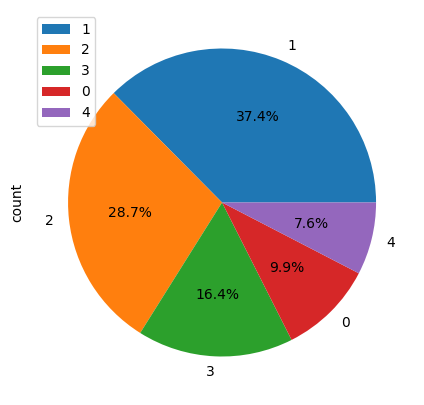

In [77]:
active_df.value_counts('Quality').plot.pie(figsize=(5, 5), autopct='%1.1f%%', startangle=0)
plt.legend()
plt.show()

In [78]:
passive_df.value_counts('Quality')

Quality
2    199
3    156
1    133
0     33
4     27
Name: count, dtype: int64

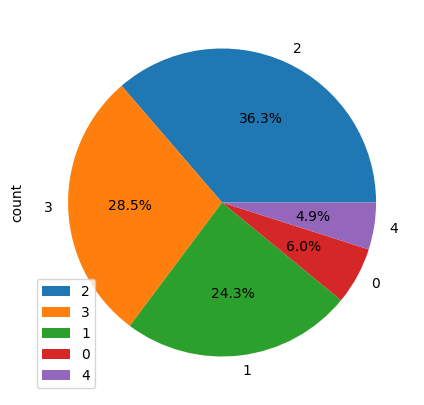

In [79]:
passive_df.value_counts('Quality').plot.pie(figsize=(5, 5), autopct='%1.1f%%', startangle=0)
plt.legend()
plt.show()

In [80]:
all_df = pd.concat([active_df, passive_df],ignore_index=True)


In [81]:
active_df.to_csv('active.csv', index = False)
passive_df.to_csv('passive.csv', index = False)
all_df.to_csv('all.csv', index = False)

Quality
2    248
1    197
3    184
0     50
4     40
Name: count, dtype: int64


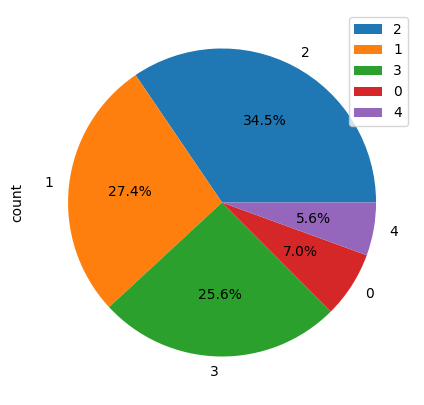

In [82]:
drawChart(all_df)

In [83]:
angel = scrapeWeb(angel_url)
angel_act = angel[2]
angel_act = getTables(angel_act)
angel_act = angel_act.drop(columns = ['Icon'])

angel_act

,Name,ID,Weight,Description
0,The Bible,5.100.33,1,"On use, Isaac gains flight for the current roo..."
1,Breath of Life,5.100.326,1,Grants a brief moment of invincibility when th...
2,Dead Sea Scrolls,5.100.124,1,Triggers the effect of a random activated item...
3,Prayer Card,5.100.146,1,Gives an Eternal Heart per use.
4,Eden's Soul,5.100.490,1,Spawns two item pedestals then is consumed. Be...
5,Void,5.100.477,10.5,Consumes all pedestal items in the room. Activ...
6,Delirious,5.100.510,0.4,Spawns Delirium as a random friendly boss th...
7,Book of Revelations,5.100.78,1,Increases the chance of a Devil Room / Angel...
8,Genesis,5.100.622,1,Removes all of Isaac's items and pickups and t...
9,Jar of Wisps,5.100.685,1,"Spawns random wisps that shoot various tears, ..."


The item "Void" got a wrong weight value, so let's reset that

In [84]:
angel_act.at[5,'Weight']='0.5'
angel_act.to_csv('angelActive.csv', index = False)
##angel_act


In [85]:
angel_ps = angel[3]
angel_ps = getTables(angel_ps)
angel_ps = angel_ps.drop(columns = ['Icon'])
angel_ps.to_csv('angelPassive.csv', index = False)

##angel_ps

In [86]:
angel_df = mergeTables(angel_act,angel_ps)
angel_df.to_csv('angel.csv', index = False)
##angel_df


In [87]:
devil = scrapeWeb(devil_url)
devil_act = devil[2]
devil_act = getTables(devil_act)
devil_act = devil_act.drop(columns = ['Icon'])
devil_act['Weight'] = devil_act['Weight'].replace('10.5','0.5')
devil_act.to_csv('devilActive.csv', index = False)
##devil_act

In [88]:
devil_ps = devil[3]
devil_ps = getTables(devil_ps)
devil_ps = devil_ps.drop(columns = ['Icon'])
devil_ps.to_csv('devilPassive.csv', index = False)

##devil_ps

In [89]:
devil_df = mergeTables(devil_act,devil_ps)
devil_df.to_csv('devil.csv', index = False)
##devil_df

In [90]:
def get_two_tables(weburl):
    url = scrapeWeb(weburl)
    if len(url) > 4: ## The page has both passive and active items 
        active = url[2]
        url_act_df = getTables(active)
        url_act_df = url_act_df.drop(columns = ['Icon'])
        url_act_df.to_csv(f'{weburl}Active.csv', index = False)

        passive = url[3]
        url_ps_df = getTables(passive)
        url_ps_df = url_ps_df.drop(columns = ['Icon'])
        url_ps_df.to_csv(f'{weburl}Passive.csv', index = False)
    else: ## The page only has passive items
        passive = url[2]
        url_ps_df = getTables(passive)
        url_ps_df = url_ps_df.drop(columns = ['Icon'])
        url_ps_df.to_csv(f"{weburl=}".split('=')[0] + "Passive.csv", index = False)

In [91]:
treasure = scrapeWeb(treasure_url)
treasure_act = treasure[2]
treasure_act = getTables(treasure_act)
treasure_act = treasure_act.drop(columns = ['Icon'])
treasure_act.to_csv('treasureActive.csv', index = False)

##treasure_act

In [92]:
treasure_ps = treasure[3]
treasure_ps = getTables(treasure_ps)
treasure_ps = treasure_ps.drop(columns = ['Icon'])
treasure_ps.to_csv('treasurePassive.csv', index = False)

##treasure_ps

In [93]:
shop = scrapeWeb(treasure_url)
shop_act = shop[2]
shop_act = getTables(shop_act)
shop_act = shop_act.drop(columns = ['Icon'])
shop_act.to_csv('shopActive.csv', index = False)

In [94]:
shop_ps = shop[3]
shop_ps = getTables(shop_ps)
shop_ps = shop_ps.drop(columns = ['Icon'])
shop_ps.to_csv('shopPassive.csv', index = False)

In [95]:
secret = scrapeWeb(secret_url)
secret_act = secret[2]
secret_act = getTables(secret_act)
secret_act = secret_act.drop(columns = ['Icon'])
secret_act.to_csv('secretActive.csv', index = False)

In [96]:
secret_ps = secret[3]
secret_ps = getTables(secret_ps)
secret_ps = secret_ps.drop(columns = ['Icon'])
secret_ps.to_csv('secretPassive.csv', index = False)

In [97]:
cursed = scrapeWeb(cursed_url)
cursed_act = cursed[2]
cursed_act = getTables(cursed_act)
cursed_act = cursed_act.drop(columns = ['Icon'])
cursed_act.to_csv('cursedActive.csv', index = False)

In [98]:
cursed_ps = cursed[3]
cursed_ps = getTables(cursed_ps)
cursed_ps = cursed_ps.drop(columns = ['Icon'])
cursed_ps.to_csv('cursedPassive.csv', index = False)

In [99]:
library = scrapeWeb(library_url)
library_act = library[2]
library_act = getTables(library_act)
library_act = library_act.drop(columns = ['Icon'])
library_act.to_csv('libraryActive.csv', index = False)

In [100]:
library_ps = library[3]
library_ps = getTables(library_ps)
library_ps = library_ps.drop(columns = ['Icon'])
library_ps.to_csv('libraryPassive.csv', index = False)

In [101]:
goldchest = scrapeWeb(goldchest_url)
goldchest_act = goldchest[2]
goldchest_act = getTables(goldchest_act)
goldchest_act = goldchest_act.drop(columns = ['Icon'])
goldchest_act.to_csv('goldchestActive.csv', index = False)

In [102]:
goldchest_ps = goldchest[3]
goldchest_ps = getTables(goldchest_ps)
goldchest_ps = goldchest_ps.drop(columns = ['Icon'])
goldchest_ps.to_csv('goldchestPassive.csv', index = False)

In [103]:
planet = scrapeWeb(planet_url)
planet_item = planet[2]
planet_item = getTables(planet_item)
planet_item = planet_item.drop(columns = ['Icon'])
planet_item.to_csv('planetarium.csv', index = False)

In [104]:
boss = scrapeWeb(boss_url)
boss_item = boss[2]
boss_item = getTables(boss_item)
boss_item = boss_item.drop(columns = ['Icon'])
boss_item.to_csv('bossItem.csv', index = False)

In [105]:
library_df = mergeTables(library_act,library_ps)
library_df.to_csv('library.csv', index = False)

In [106]:
goldchest_df = mergeTables(goldchest_act, goldchest_act)
goldchest_df.to_csv('goldchest.csv', index = False)

In [107]:
secret_df = mergeTables(secret_act,secret_ps)
secret_df.to_csv('secret.csv', index = False)

In [108]:
shop_df = mergeTables(shop_act,shop_ps)
shop_df.to_csv('shop.csv', index = False)

In [109]:
cursed_df = mergeTables(cursed_act,cursed_ps)
cursed_df.to_csv('cursed.csv', index = False)

In [116]:
import os
import shutil
import glob

source_folder = r"C:\Users\ACER\OneDrive\Desktop\The Binding of I sus"
destination_folder = r"C:\Users\ACER\OneDrive\Desktop\The Binding of I sus\data\\"

# Search files with .txt extension in source directory
pattern = "\*.csv"
files = glob.glob(source_folder + pattern)

# move the files with txt extension
for file in files:
    # extract file name form file path
    file_name = os.path.basename(file)
    shutil.move(file, destination_folder + file_name)
